# Housekeeping notes

- for this I'm just going to pull values from other notebooks

# Setup code

In [54]:
# Import Packages
import Pkg

Pkg.add("Plots")
Pkg.add("LsqFit")
Pkg.add("DelimitedFiles")
Pkg.add("PlotlyJS")  # optional if you later want interactive plots
Pkg.add("LaTeXStrings")

   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`


Style for plots

In [55]:
using Plots,DelimitedFiles,LsqFit,LaTeXStrings

include("src/PhotoPeakFit.jl");

default(framestyle=:box,
        mc=:black,
        grid=false,
        guidefont=14,
        tickfont=12,
        lc=:navy,
        xlabel="Eᵧ (internal)",
        ylabel="counts")

May or may not need these, adding them for consistency

In [56]:
kliterature = [564.79,
               586.01,
               2013.45]

3-element Vector{Float64}:
  564.79
  586.01
 2013.45

Efficiency Calibrations
- may or may not need this either, inlcuding for consistency

In [57]:
# Fit function is of the form 50^(p[1]+p[2]*log10(e)+p[3]*log10(e)^2)
io = open("calibrations/Eu152-efficiency-cal.csv", "r")
clover_eff_params = readdlm(io, ',', Float64, '\n', comments=true, comment_char='#')
close(io)

c0_eff_fit, c1_eff_fit, c2_eff_fit = clover_eff_params[1,:],clover_eff_params[2,:],clover_eff_params[3,:]

c0_eff_params,c1_eff_params,c2_eff_params = [c0_eff_fit[1],c0_eff_fit[3],c0_eff_fit[5]],
                                            [c1_eff_fit[1],c1_eff_fit[3],c1_eff_fit[5]],
                                            [c2_eff_fit[1],c2_eff_fit[3],c2_eff_fit[5]]

c0_σeff,c1_σeff,c2_σeff = [c0_eff_fit[2],c0_eff_fit[4],c0_eff_fit[6]], 
                          [c1_eff_fit[2],c1_eff_fit[4],c1_eff_fit[6]],
                          [c2_eff_fit[2],c2_eff_fit[4],c2_eff_fit[6]]

([0.04994475356378319, 0.03881764706440051, 0.0074349631904078745], [0.059208192080767955, 0.0466367978146129, 0.009090355673327628], [0.048188710602606065, 0.03712260347339793, 0.007054630479249403])

# Values from previous books

## K47_T1_001

In [93]:
# Clover 0 (N_0)
N_0_plus = [551112.459447147, 3.2015988389246287e6, 1.415436367300364e6]
N_0_σplus = [5093.306800184273, 29643.71840995894, 13254.733084601521]

# Clover 1 (N_1)
N_180_plus = [76156.0625946827, 435329.2792522732, 203994.8023015002]
N_180_σplus = [1370.7139462257294, 7199.422159068407, 2232.2697899070095]

# Clover 2 (N_2)
N_2_plus =  [603553.4687765208, 4.311935657026002e6, 1.8547849975897027e6]
N_2_σplus = [6188.211940066402, 26529.250721938202, 14249.526711352057]

3-element Vector{Float64}:
  6188.211940066402
 26529.250721938202
 14249.526711352057

## K47_T1_002

In [44]:
# Clover 0 (N_0)
N_0_minus = [1.7292393731881208e6, 9.88212108370103e6, 4.398562361741757e6]
N_0_σminus = [16050.629959403417, 93756.90047874278, 39184.186824577744]

# Clover 1 (N_1)
N_180_minus = [236566.33601433228, 1.3565204672148577e6, 634836.849390847]
N_180_σminus = [3961.9639426417566, 21960.829776956114, 6969.598277971881]

# Clover 2 (N_2)
N_2_minus = [1.8711658167610366e6, 1.331937993592412e7, 5.753199323518829e6]
N_2_σminus = [17701.44329916337, 97206.85129298695, 52292.721476740684]

3-element Vector{Float64}:
 17701.44329916337
 97206.85129298695
 52292.721476740684

# IS733 analysis report

In [13]:
R_fun(A, B, C, D) = (A .* D) ./ (B .* C)


err(A, B, C, D, σA, σB, σC, σD) = ((((σA) .^2) .* ((D ./ (B .* C)) .^ 2)) .+ (((σB) .^ 2) .* (((-A .* D) ./ ((B .^ 2) .* C)) .^ 2)) .+ (((σC) .^2) .* (((-A .* D) ./ (B .* (C .^ 2))) .^2)) .+ (((σD) .^ 2) .* ((A ./ (B .* C)) .^ 2))) .^ (0.5)

R = R_fun(N_0_plus, N_180_plus, N_0_minus, N_180_minus)
println(R)

error_r = err(N_0_plus, N_180_plus, N_0_minus, N_180_minus, N_0_σplus, N_180_σplus, N_0_σminus, N_180_σminus)
println(error_r)


[0.9899963090942512, 1.0095439160443338, 1.0014346681068445]
[0.027578271772194997, 0.02692533110808561, 0.02021125625605141]


In [16]:
AP = (((R) .^ (0.5)) .- 1) ./ (((R) .^ (0.5)) .+ 1)

err_AP(V, σV) = σV ./ ((V .^ 0.5) .* (((V .^ 0.5) .+ 1) .^ 2))

error_AP = err_AP(R, error_r)

println(AP)
println(error_AP)

[-0.0025135107187665086, 0.0023746606845474237, 0.0003584099731058751]
[0.006964192009256621, 0.006667659238957062, 0.005045574689851701]


## Plots

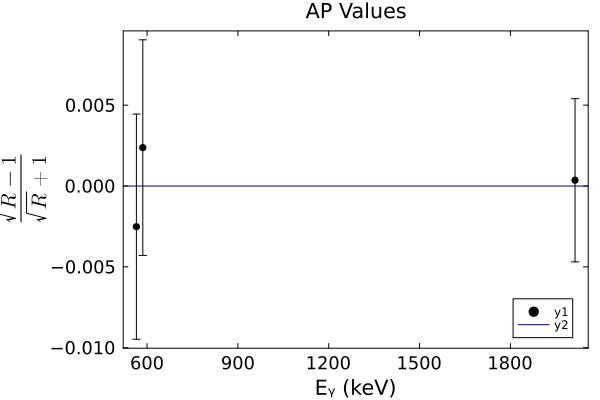

In [25]:
using Plots

# your plot command
p = scatter(kliterature, AP, yerr=error_AP,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{\sqrt{R} - 1}{\sqrt{R} + 1}",
    title = "AP Values"
)

# optional horizontal line
hline!(p, [0])

In [34]:
# Saving plot to directory
#savefig(p, "ap_plot.pdf")
savefig(p, "/Users/josie/Desktop/Research/Madurga/plots/ap_plot.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/ap_plot.pdf"

# Assorted Asymmetry Calculations

## 6-26-25 Proposed Asymmetry

### T1_001

#### $$\frac{N_1}{N_2} - 1$$

In [32]:
asym_001_1 = (N_180_plus ./ N_2_plus) .- 1

asym_001_1_err = (((N_180_σplus .^ 2) .* ((1 ./ N_2_plus) .^ 2)) .+ ((N_2_σplus .^ 2) .* ((-N_180_plus ./ (N_2_plus .^ 2)) .^ 2))) .^ (0.5)

3-element Vector{Float64}:
 0.0008275668087112212
 0.0005908146224112476
 0.0005043968025727712

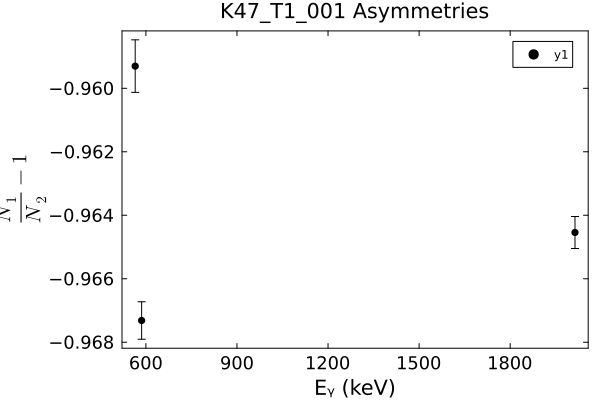

In [37]:
# Plotting this asymmetry
q = scatter(kliterature, asym_001_1, yerr=asym_001_1_err,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{N_1}{N_2} -1",
    title = "K47_T1_001 Asymmetries"
)

In [38]:
savefig(q, "/Users/josie/Desktop/Research/Madurga/plots/T1_001_asym_N2.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/T1_001_asym_N2.pdf"

#### $$\frac{N_1}{N_0} - 1$$

In [40]:
asym_001_2 = (N_180_plus ./ N_0_plus) .- 1

asym_001_2_err = (((N_180_σplus .^ 2) .* ((1 ./ N_0_plus) .^ 2)) .+ ((N_0_σplus .^ 2) .* ((-N_180_plus ./ (N_0_plus .^ 2)) .^ 2))) .^ (0.5)

3-element Vector{Float64}:
 0.002795894024892647
 0.0025771395999750176
 0.002075733023504031

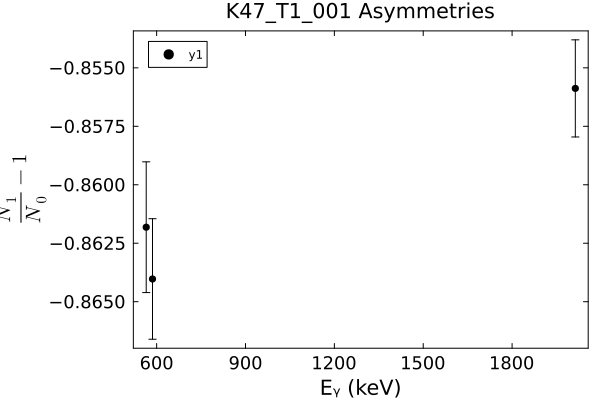

In [41]:
# Plotting this asymmetry
q = scatter(kliterature, asym_001_2, yerr=asym_001_2_err,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{N_1}{N_0} -1",
    title = "K47_T1_001 Asymmetries"
)

In [42]:
savefig(q, "/Users/josie/Desktop/Research/Madurga/plots/T1_001_asym_N0.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/T1_001_asym_N0.pdf"

### T1_002

#### $$\frac{N_1}{N_2} - 1$$

In [45]:
asym_002_1 = (N_180_minus ./ N_2_minus) .- 1

asym_002_1_err = (((N_180_σminus .^ 2) .* ((1 ./ N_2_minus) .^ 2)) .+ ((N_2_σminus .^ 2) .* ((-N_180_minus ./ (N_2_minus .^ 2)) .^ 2))) .^ (0.5)

3-element Vector{Float64}:
 0.002431818508470183
 0.0018085831648100518
 0.0015727350912596674

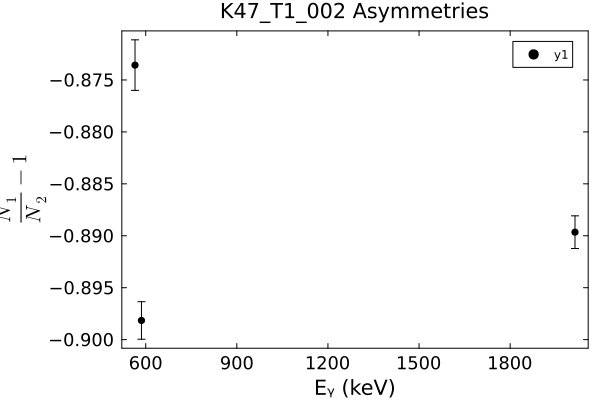

In [46]:
# Plotting this asymmetry
q = scatter(kliterature, asym_002_1, yerr=asym_002_1_err,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{N_1}{N_2} -1",
    title = "K47_T1_002 Asymmetries"
)

In [47]:
savefig(q, "/Users/josie/Desktop/Research/Madurga/plots/T1_002_asym_N2.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/T1_002_asym_N2.pdf"

#### $$\frac{N_1}{N_0} - 1$$

In [49]:
asym_002_2 = (N_180_minus ./ N_0_minus) .- 1

asym_002_2_err = (((N_180_σminus .^ 2) .* ((1 ./ N_0_minus) .^ 2)) .+ ((N_0_σminus .^ 2) .* ((-N_180_minus ./ (N_0_minus .^ 2)) .^ 2))) .^ (0.5)

3-element Vector{Float64}:
 0.0026195041318151494
 0.002575781687690093
 0.0020405414951080673

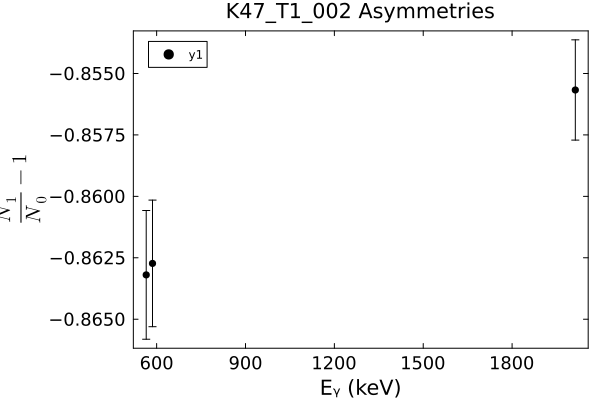

In [50]:
# Plotting this asymmetry
q = scatter(kliterature, asym_002_2, yerr=asym_002_2_err,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{N_1}{N_0} -1",
    title = "K47_T1_002 Asymmetries"
)

In [52]:
savefig(q, "/Users/josie/Desktop/Research/Madurga/plots/T1_002_asym_N0.pdf")

"/Users/josie/Desktop/Research/Madurga/plots/T1_002_asym_N0.pdf"

## Ratios

### Raw

#### T1_001

#### T1_002

### Efficiency Corrected

In [59]:
@. powerfit(v,p)=10^(p[1]+(p[2]*log10(v))+(p[3]*(log10(v)^2)))

powerfit (generic function with 1 method)

#### T1_001

In [98]:
# Correcting efficincies for values below

ϵ = [powerfit(kliterature,c0_eff_params),
     powerfit(kliterature,c1_eff_params),
     powerfit(kliterature,c2_eff_params)]

N0_intensity = N_0_plus ./ ϵ[1] 
N1_intensity = (N_180_plus ./ ϵ[2]) .* (3/4)  ########
N2_intensity = (N_2_plus ./ ϵ[3]) .* (3/4)

println(N0_intensity, N1_intensity,N2_intensity)



[5.9798035686813965e7, 3.578878292435719e8, 4.862394281842146e8][5.878633187671895e7, 3.458562780941756e8, 5.0133678208319896e8][5.369989023330636e7, 3.9475060839069223e8, 4.711926118614669e8]


In [99]:
# Or does that need to be done like this?

N0 = N_0_plus
N1 = N_180_plus .* 0.75
N2 = N_2_plus .* 0.75

3-element Vector{Float64}:
 452665.1015823906
      3.2339517427695016e6
      1.391088748192277e6

#### T1_002

In [101]:
# correcting efficiencies for values below

ϵ = [powerfit(kliterature,c0_eff_params),
     powerfit(kliterature,c1_eff_params),
     powerfit(kliterature,c2_eff_params)]

N0_intensity = N_0_minus ./ ϵ[1] 
N1_intensity = (N_180_minus ./ ϵ[2]) .* (3/4)  ########
N2_intensity = (N_2_minus ./ ϵ[3]) .* (3/4)

println(N0_intensity, N1_intensity, N2_intensity)

[1.8762979492911258e8, 1.1046639635076265e9, 1.5110212631353593e9][1.8261011226135713e8, 1.0777155185962672e9, 1.5601724143493195e9][1.6648301130978703e8, 1.2193672984256036e9, 1.4615521579758499e9]


In [100]:
# Or does that need to be done like this?

N0 = N_0_minus
N1 = N_180_minus .* 0.75
N2 = N_2_minus .* 0.75

3-element Vector{Float64}:
 1.4033743625707775e6
 9.98953495194309e6
 4.3148994926391225e6